In [4]:
import pandas as pd
import numpy as np
#reading the excel file
df=pd.read_excel(r"E:\College\SEMESTER 4\MACHINE LEARNING\Lab Session1 Data.xlsx",  sheet_name="Purchase data", usecols = 'B:E')
df

,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,20,6,2,386
1,16,3,6,289
2,27,6,2,393
3,19,1,2,110
4,24,4,2,280
5,22,1,5,167
6,15,4,2,271
7,18,4,2,274
8,21,1,4,148
9,16,2,4,198


In [5]:
#making the data frame
A = df[['Candies (#)', 'Mangoes (Kg)','Milk Packets (#)']]
C = df['Payment (Rs)']
print(A)
print(" ")
print(C)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4
 
0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64


In [6]:
#dimensionionality
dimension=df.shape[1]
print("dimension of the given dataset:",dimension)
#number of vectors
vectors=df.shape[0]
print("Number of vectors in the given dataset:",vectors)
#rank of the matrix
rank=np.linalg.matrix_rank(A)
print("Rank of matrix A:",rank)
#pseudo-inverse
A_1=np.linalg.pinv(A)
X=A_1@C
# print(A_1)
print(X)

dimension of the given dataset: 4
Number of vectors in the given dataset: 10
Rank of matrix A: 3
[ 1. 55. 18.]


In [7]:
#Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products  
A_1=np.linalg.pinv(A)
X=A_1@C
# print(A_1)
print(X)

[ 1. 55. 18.]


In [8]:
import pandas as pd
def categorize_customer(payment):
    if payment >= 200:
        return "Rich"
    else:
        return "Poor"
payment_column = df.iloc[:, 3] 
df['Category'] = payment_column.apply(categorize_customer)

print(df)


   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Category
0           20             6                 2           386     Rich
1           16             3                 6           289     Rich
2           27             6                 2           393     Rich
3           19             1                 2           110     Poor
4           24             4                 2           280     Rich
5           22             1                 5           167     Poor
6           15             4                 2           271     Rich
7           18             4                 2           274     Rich
8           21             1                 4           148     Poor
9           16             2                 4           198     Poor


In [18]:
import pandas as pd
import numpy as np
#reading the excel sheet
df=pd.read_excel(r"E:\College\SEMESTER 4\MACHINE LEARNING\Lab Session1 Data.xlsx",  sheet_name="IRCTC Stock Price", usecols = 'B:I')
df


,Month,Day,Price,Open,High,Low,Volume,Chg%
0,Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...
244,Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


mean= 1560.6634538152612
standard deviation 242.34761264047802
variation 58732.36535253918
Wednesday Mean: 1550.7060000000001
Population Mean: 1560.6634538152612
April Mean: 1698.9526315789474
Population Mean: 1560.6634538152612
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional Probability of making a profit given it's Wednesday: 0.42


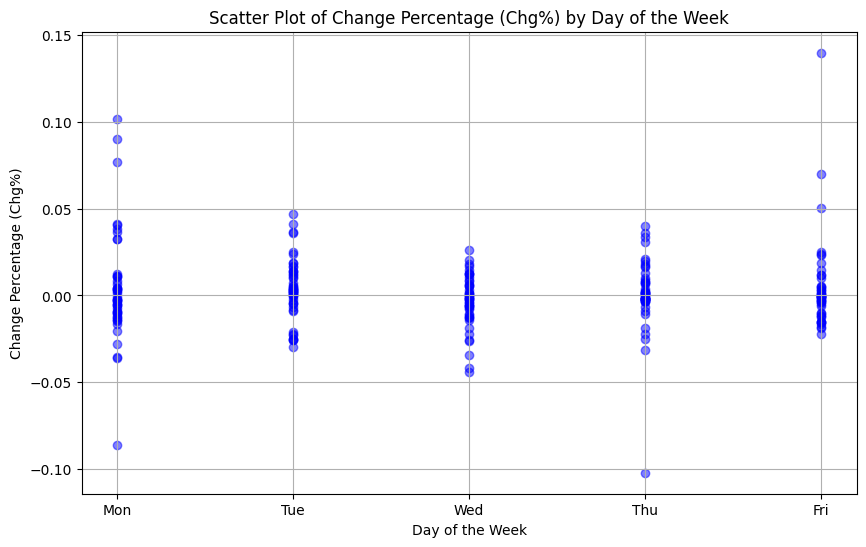

In [23]:
price = df.iloc[:, 2] 
price
#mean
mean=price.mean()
#standard deviation
std_deviation=price.std()
#variation
variation=price.var()
print("mean=",mean)
print("standard deviation",std_deviation)
print("variation",variation)

#filtering all the wednesday's
wednesday_prices = df[df['Day'] == 'Wed']['Price']
#mean of all wednesday prices
wednesday_mean = wednesday_prices.mean()
#population mean
population_mean = df['Price'].mean()
#difference between wednesday mean and population mean
print("Wednesday Mean:", wednesday_mean)
print("Population Mean:", population_mean)

#filtering all the April's
april_prices = df[df['Month'] == 'Apr']['Price']
#mean of all April prices
april_mean = april_prices.mean()
#population mean
population_mean = df['Price'].mean()
#difference between april mean and population mean
print("April Mean:", april_mean)
print("Population Mean:", population_mean)

#probability of making a loss
import pandas as pd
loss_days_count = df['Chg%'].apply(lambda x: x < 0).sum()
total_days = len(df)
probability_loss = loss_days_count / total_days
print("Probability of making a loss:", probability_loss)

#probability of making a loss on wednesday
wednesdays = df[df['Day'] == 'Wed']
profitable_wednesdays_count = wednesdays['Chg%'].apply(lambda x: x > 0).sum()
total_wednesdays = len(wednesdays)
probability_profit_wednesday = profitable_wednesdays_count / total_wednesdays if total_wednesdays > 0 else 0
print("Probability of making a profit on Wednesday:", probability_profit_wednesday)


# Calculate the conditional probability of making profit, given that today is Wednesday
wednesdays = df[df['Day'] == 'Wed']
profitable_wednesdays_count = wednesdays['Chg%'].apply(lambda x: x > 0).sum()
total_wednesdays = len(wednesdays)
probability_profit_given_wednesday = profitable_wednesdays_count / total_wednesdays if total_wednesdays > 0 else 0
print("Conditional Probability of making a profit given it's Wednesday:", probability_profit_given_wednesday)


#scatter plot
import matplotlib.pyplot as plt
# Converting 'Day' to a categorical type with ordered categories
df['Day'] = pd.Categorical(df['Day'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], ordered=True)
# Sort the DataFrame by 'Day' to ensure the plot follows the week order
df_sorted = df.sort_values(by='Day')
# Scatter plot of 'Chg%' against 'Day of the week'
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['Day'], df_sorted['Chg%'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Change Percentage (Chg%) by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Change Percentage (Chg%)')
plt.grid(True)
plt.show()


